In [2]:
import os
import sys
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../modules/")
from DS_healpix_fragmentation import radec2pix
from DS_Planck_Unet import east_val, west_val
from DS_models_stat import cut_cat
%config InlineBackend.figure_format = 'retina'

In [7]:
matplotlib.rcParams["font.size"] = 15

In [4]:
def pic_df(filename: str, name: str = None, nside: int = 2**7, dict_cut={}):
    df = pd.read_csv(filename)
    df = cut_cat(df, dict_cut=dict_cut)
    if name is None:
        name = os.path.basename(filename)
        name = name[:name.index(".")]
    
    a = np.zeros(hp.nside2npix(nside))
    a[radec2pix(df['RA'], df['DEC'], nside)] = 1
    hp.mollview(a, nest=True, cbar=False, title=name)

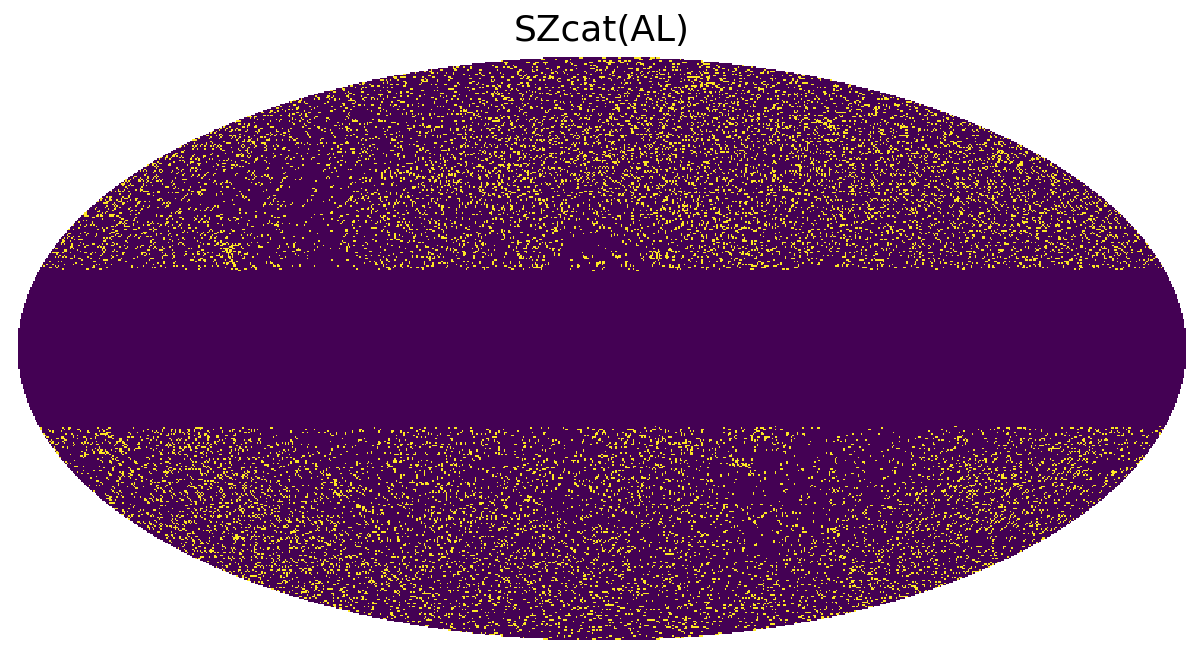

In [8]:
pic_df("../Data/detected_cats/SZcatAL.csv", dict_cut={'b' : [20, np.inf]}, name="SZcat(AL)")

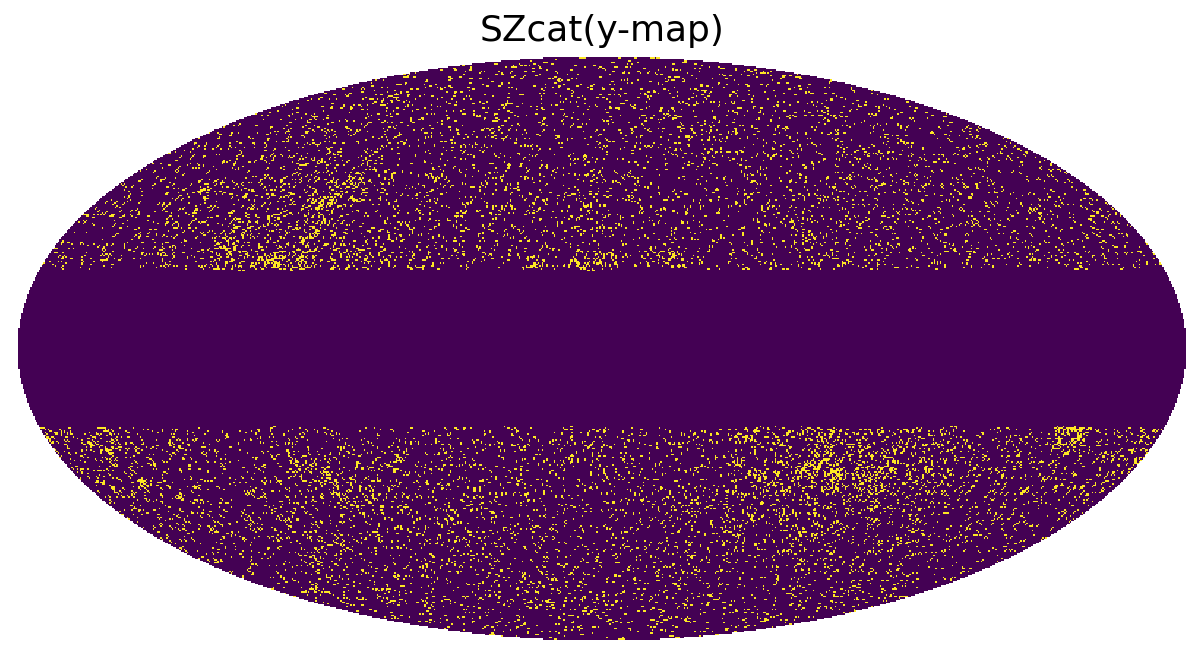

In [9]:
pic_df("../Data/detected_cats/SZcat_ymap.csv", dict_cut={'b' : [20, np.inf]}, name="SZcat(y-map)")